In [5]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\Python\Data Science\Potato Disease Classification\Data\PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 2 1 0 1 1 1 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 2 1 1 1 0]


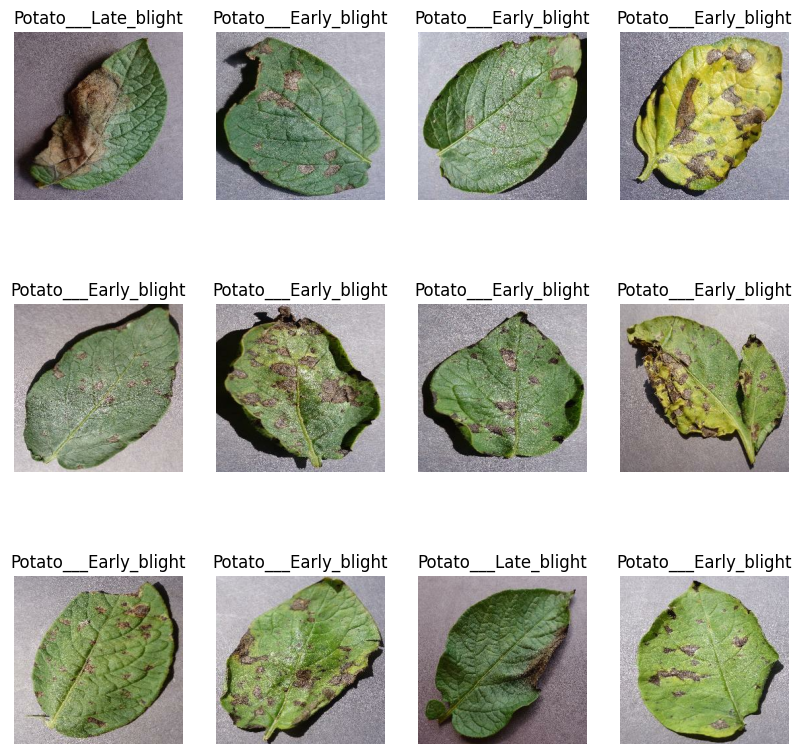

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [12]:
len(dataset)
#80% for training
#10% for validation
#10% for test

68

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_data = dataset.take(54)
len(train_data)

54

In [15]:
test_data = dataset.skip(54)
len(test_data)

14

In [16]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [17]:
validation_data  = test_data.take(6)
len(validation_data)

6

In [18]:
test_data = test_data.skip(6)
len(test_data)

8

In [19]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds  = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    validation_size = int(val_split * ds_size)
    
    train_data = ds.take(train_size)
    
    validation_data = ds.skip(train_size).take(validation_size)
    test_data = ds.skip(train_size).skip(validation_size)
    return train_data, validation_data, test_data

In [20]:
train_data, validation_data, test_data = get_dataset_partition(dataset)

In [21]:
len(train_data)
len(validation_data)
len(test_data)

8

In [22]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [23]:
reqize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [31]:
n_classes = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    reqize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [33]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_data,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data=validation_data
)

Epoch 1/50


54/54 [==============================] - 86s 2s/step - loss: 0.8653 - accuracy: 0.5012 - val_loss: 0.7587 - val_accuracy: 0.6094
Epoch 2/50
54/54 [==============================] - 75s 1s/step - loss: 0.7313 - accuracy: 0.6534 - val_loss: 0.6504 - val_accuracy: 0.6927
Epoch 3/50
54/54 [==============================] - 74s 1s/step - loss: 0.5511 - accuracy: 0.7384 - val_loss: 0.4563 - val_accuracy: 0.7656
Epoch 4/50
54/54 [==============================] - 74s 1s/step - loss: 0.4760 - accuracy: 0.7807 - val_loss: 0.3783 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 65s 1s/step - loss: 0.3491 - accuracy: 0.8623 - val_loss: 0.2865 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 74s 1s/step - loss: 0.2575 - accuracy: 0.8935 - val_loss: 0.2495 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 89s 2s/step - loss: 0.2683 - accuracy: 0.8848 - val_loss: 0.2248 - val_accuracy: 0.9115
Epoch 8/50
54/54 [=============

In [35]:
scores = model.evaluate(test_data)

8/8 [==============================] - 14s 371ms/step - loss: 0.2447 - accuracy: 0.9062


In [36]:
scores

[0.2446918487548828, 0.90625]

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
history.history['accuracy']

[0.5011574029922485,
 0.6533564925193787,
 0.7384259104728699,
 0.7806712985038757,
 0.8622685074806213,
 0.8935185074806213,
 0.8848379850387573,
 0.8993055820465088,
 0.9247685074806213,
 0.9432870149612427,
 0.9484953880310059,
 0.9479166865348816,
 0.9583333134651184,
 0.9554398059844971,
 0.9542824029922485,
 0.9837962985038757,
 0.9814814925193787,
 0.9675925970077515,
 0.9809027910232544,
 0.984375,
 0.9780092835426331,
 0.984375,
 0.9791666865348816,
 0.9878472089767456,
 0.9861111044883728,
 0.9878472089767456,
 0.9814814925193787,
 0.9872685074806213,
 0.9803240895271301,
 0.9855324029922485,
 0.9930555820465088,
 0.9814814925193787,
 0.9866898059844971,
 0.9942129850387573,
 0.984375,
 0.9675925970077515,
 0.9895833134651184,
 0.9942129850387573,
 0.9930555820465088,
 0.9936342835426331,
 0.9942129850387573,
 0.9942129850387573,
 0.9895833134651184,
 0.9976851940155029,
 0.9965277910232544,
 0.9901620149612427,
 0.9976851940155029,
 0.9930555820465088,
 0.9947916865348816,
 

In [49]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

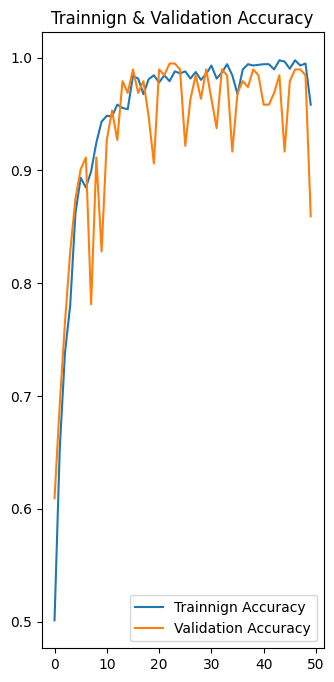

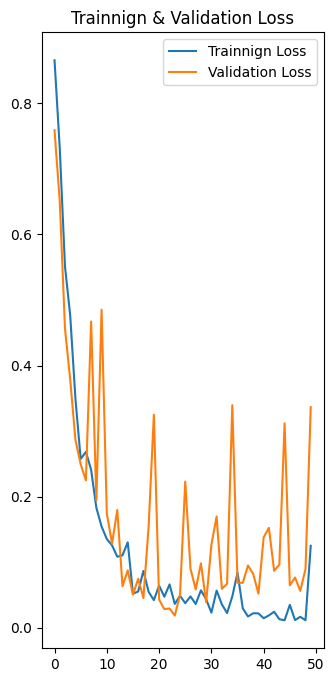

In [53]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), accuracy, label = "Trainnign Accuracy")
plt.plot(range(EPOCH), val_accuracy, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Trainnign & Validation Accuracy")

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label = "Trainnign Loss")
plt.plot(range(EPOCH), val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title("Trainnign & Validation Loss")
plt.show()